In [120]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv('data/cleaned_final_data.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7774 entries, 0 to 7773
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7774 non-null   int64  
 1   property_type       7774 non-null   object 
 2   price               7774 non-null   int64  
 3   bed                 7774 non-null   int64  
 4   bath                7774 non-null   float64
 5   sqft                7774 non-null   int64  
 6   address             7774 non-null   object 
 7   link                7774 non-null   object 
 8   solddate            7774 non-null   object 
 9   built_year          7774 non-null   float64
 10  renovated_year      7774 non-null   float64
 11  lotsize             7591 non-null   float64
 12  story               5948 non-null   float64
 13  garage              7774 non-null   int64  
 14  parking             6856 non-null   float64
 15  zipcode             7774 non-null   int64  
 16  city  

In [72]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train_val, X_test, y_train_val, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=3)
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_valid, y_valid)
    train_score = lr_model.score(X_train, y_train)
    
    # report results
    print('\nTrain R^2 score was:', train_score)
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

**Simple Validation**

In [57]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
X = df[['bed','bath','sqft','built_year','renovated_year', 'garage', 'Single Family Home', 'central', 'low', 'mid']]
y = df['price']
X_train_val, X_test, y_train_val, y_test = train_test_split(df[['bed','bath','sqft','built_year','renovated_year', 'garage', 'Single Family Home', 'central', 'low', 'mid']], df['price'], test_size=0.2, random_state=42)

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=3)

In [66]:
m = LinearRegression()
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.45519800664096455

In [67]:
m.score(X_valid, y_valid)

0.6337894666673425

train score < valid score (under fitting)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


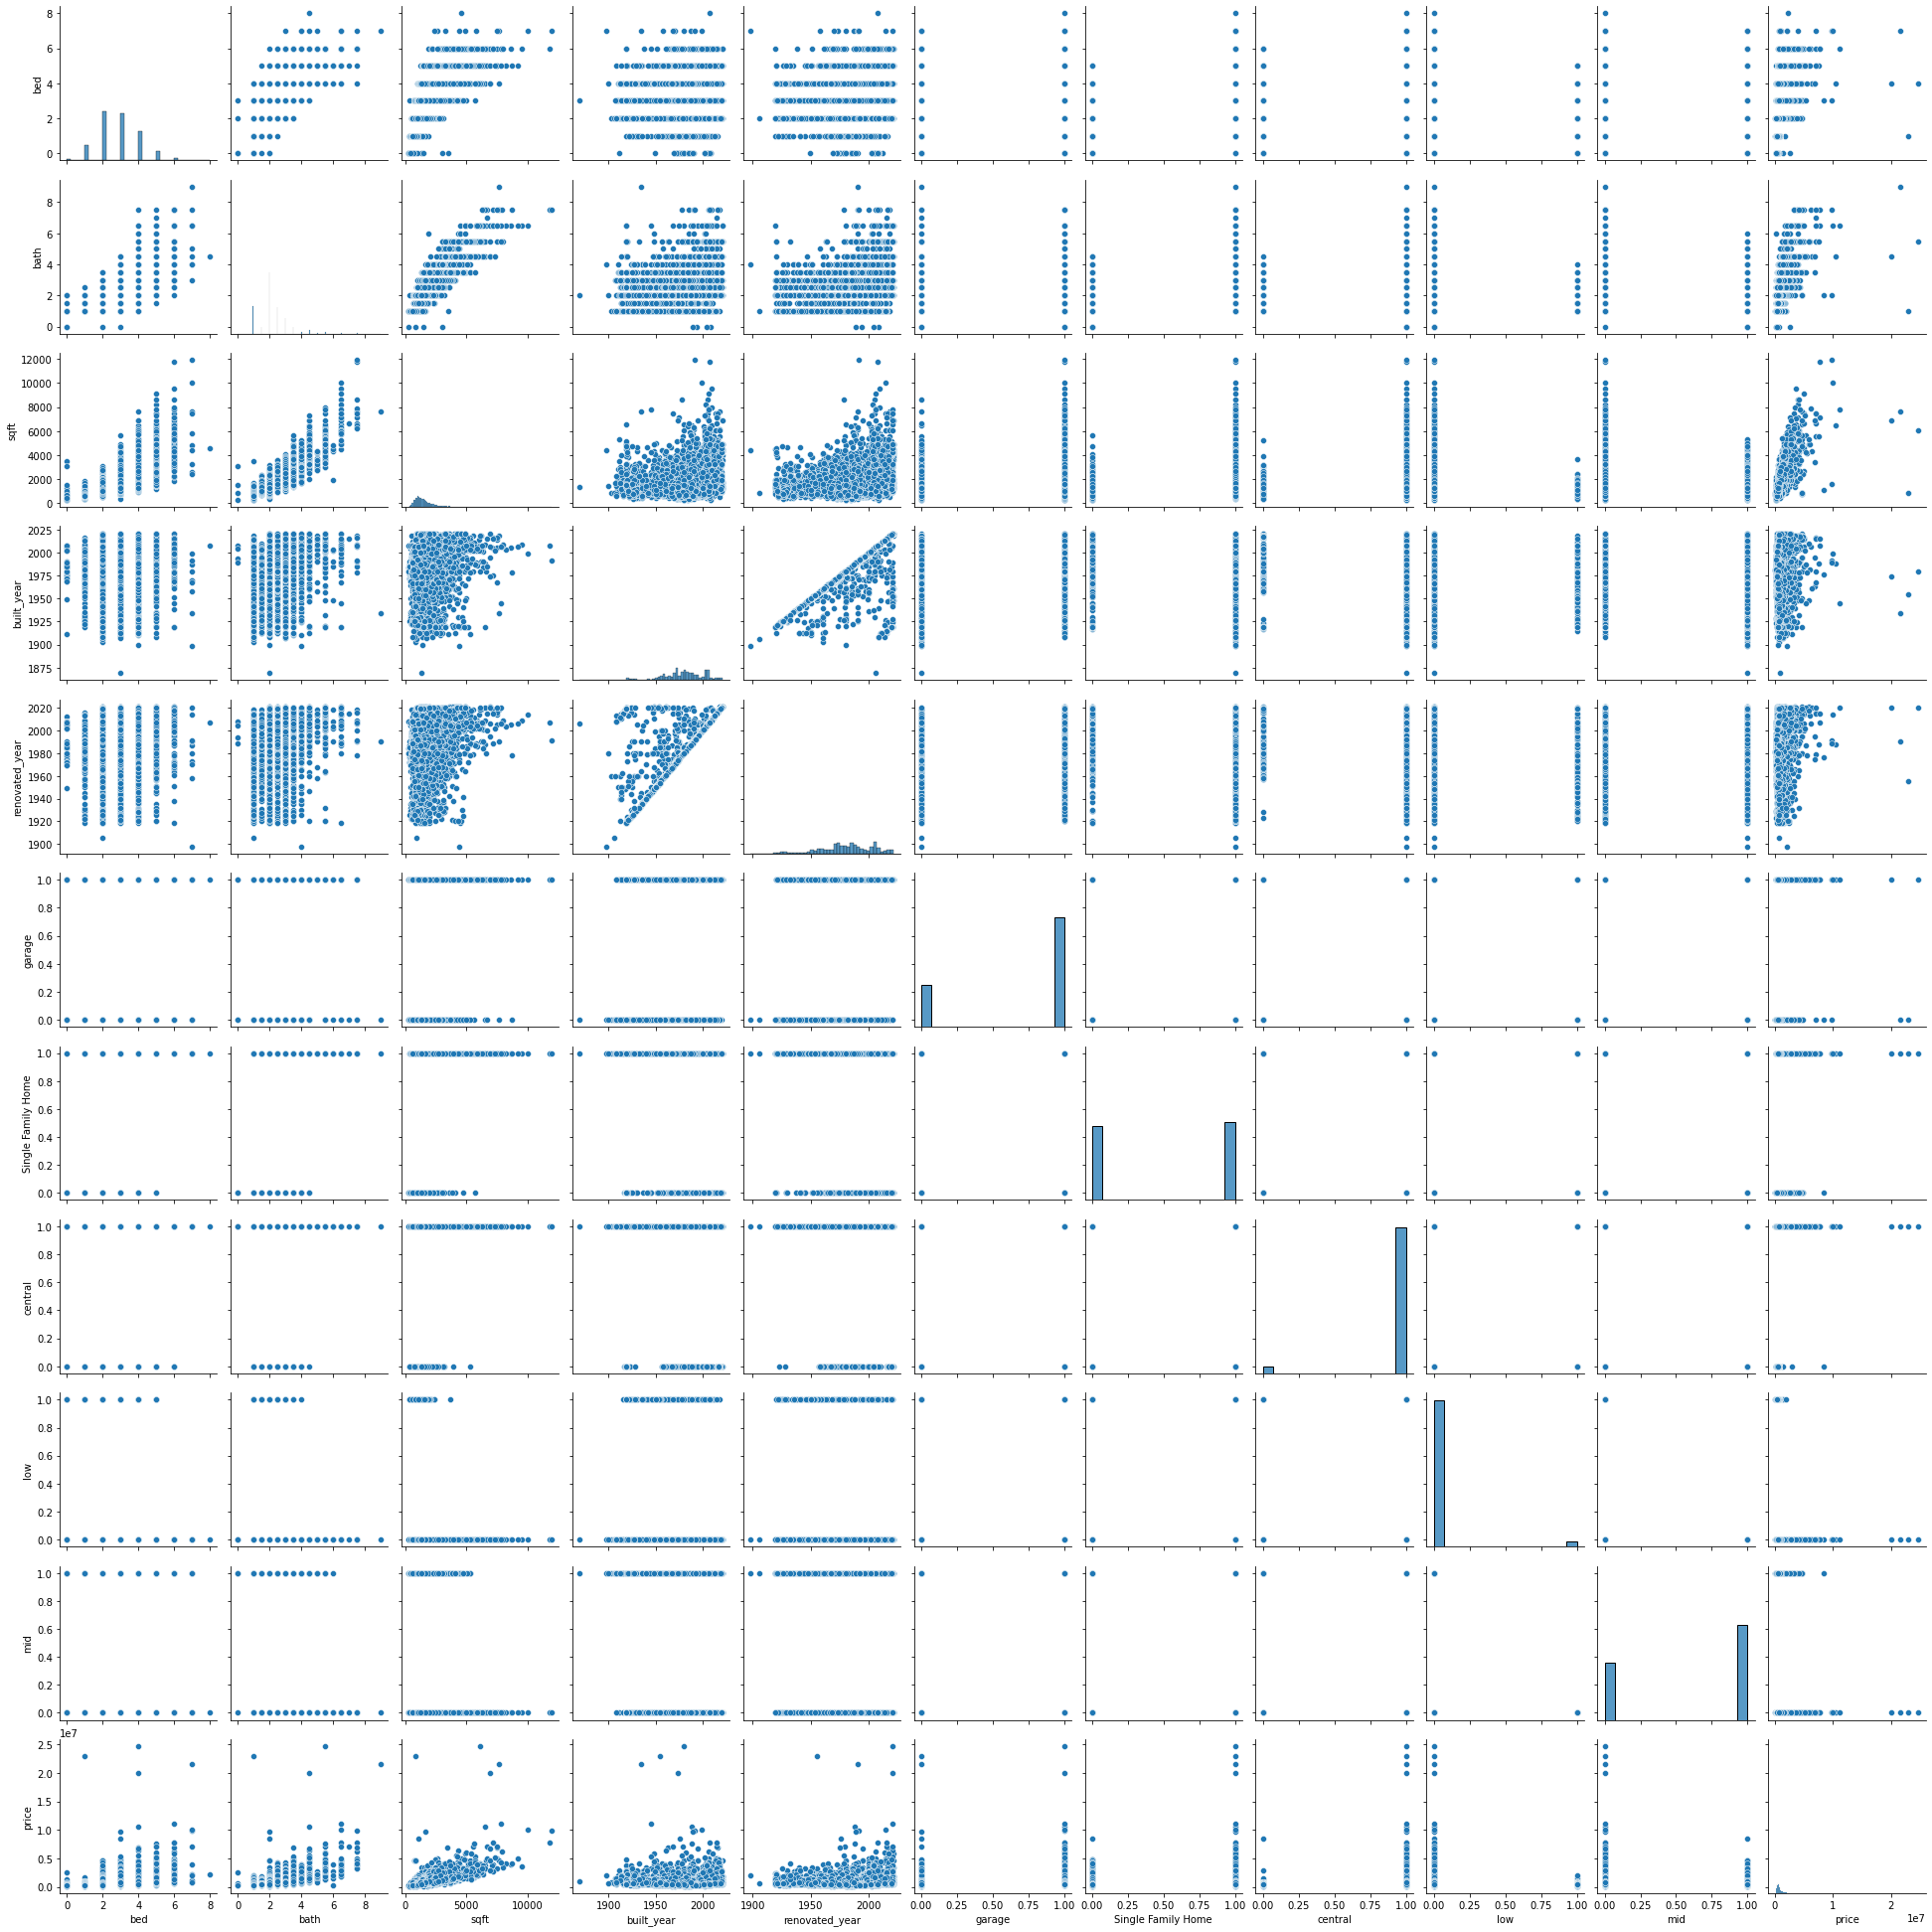

In [37]:
sns.pairplot(df[['bed','bath','sqft','built_year','renovated_year', 'garage', 'Single Family Home', 'central', 'low', 'mid','price']])

In [70]:
lm = LinearRegression()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_valid_scaled = scaler.fit_transform(X_valid.values)
X_test_scaled = scaler.fit_transform(X_test.values)

lm_reg = Ridge(alpha=1)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X.values)
X_train_poly = poly.fit_transform(X_train.values)
X_valid_poly = poly.transform(X_valid.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [55]:
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {lm.score(X_valid, y_valid):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_valid_scaled, y_valid):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_valid_poly, y_valid):.3f}')

Linear Regression train R^2: 0.455
Linear Regression val R^2: 0.634
Ridge Regression val R^2: 0.636
Degree 2 polynomial regression train R^2: 0.512
Degree 2 polynomial regression val R^2: 0.641


In [49]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.493


In [71]:
lm_poly.fit(X_poly,y)
print(f'Linear Regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Linear Regression test R^2: 0.654


**Further means to improve underfitting model**

sqft ^ 2

In [68]:
X2 = X.copy()
X2['sqft2'] = X2['sqft']**2
X2['bath2'] = X2['bath']**2

In [65]:
split_and_validate(X,y) #original split and validate data 0.8/0.2 split once


Train R^2 score was: 0.4912850984954905

Validation R^2 score was: 0.4799266023982055
Feature coefficient results: 

bed : -153055.46
bath : 60137.88
sqft : 591.38
built_year : -5826.03
renovated_year : 3020.90
garage : 12388.70
Single Family Home : 115754.94
central : 142295.85
low : -253122.09
mid : -173868.78


In [75]:
split_and_validate(X,y) #split twice 0.6 0.2 0.2 


Train R^2 score was: 0.45519800664096455

Validation R^2 score was: 0.6337894666673425
Feature coefficient results: 

bed : -162703.90
bath : 50114.46
sqft : 616.73
built_year : -5612.53
renovated_year : 2895.13
garage : 1234.65
Single Family Home : 128632.99
central : 137049.26
low : -251481.18
mid : -171424.80


In [73]:
split_and_validate(X2,y) 


Train R^2 score was: 0.46432908775590287

Validation R^2 score was: 0.6218405382607135
Feature coefficient results: 

bed : -114477.94
bath : 185371.28
sqft : 214.46
built_year : -5690.34
renovated_year : 3470.90
garage : 20975.18
Single Family Home : 169660.84
central : 142183.15
low : -308072.77
mid : -198895.57
sqft2 : 0.06
bath2 : -22937.59


**possible outliers price>20000000**

In [94]:
df2 = df.copy()

In [95]:
df2= df2[df2['price']<20000000] # 0 < price < 2623571 (price within 2 std)

In [96]:
X = df2[['bed','bath','sqft','built_year','renovated_year', 'garage', 'Single Family Home', 'central', 'low', 'mid']]
y = df2['price']

In [97]:
split_and_validate(X,y)


Train R^2 score was: 0.6184038156289084

Validation R^2 score was: 0.5966460015702952
Feature coefficient results: 

bed : -128625.30
bath : 73060.55
sqft : 548.10
built_year : -5059.95
renovated_year : 2919.35
garage : 22443.99
Single Family Home : 118382.83
central : 186454.47
low : -250734.24
mid : -167586.32


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7773
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          7770 non-null   int64  
 1   property_type       7770 non-null   object 
 2   price               7770 non-null   object 
 3   bed                 7770 non-null   int64  
 4   bath                7770 non-null   float64
 5   sqft                7770 non-null   int64  
 6   address             7770 non-null   object 
 7   link                7770 non-null   object 
 8   solddate            7770 non-null   object 
 9   built_year          7770 non-null   float64
 10  renovated_year      7770 non-null   float64
 11  lotsize             7587 non-null   float64
 12  story               5944 non-null   float64
 13  garage              7770 non-null   int64  
 14  parking             6854 non-null   float64
 15  zipcode             7770 non-null   int64  
 16  city  

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


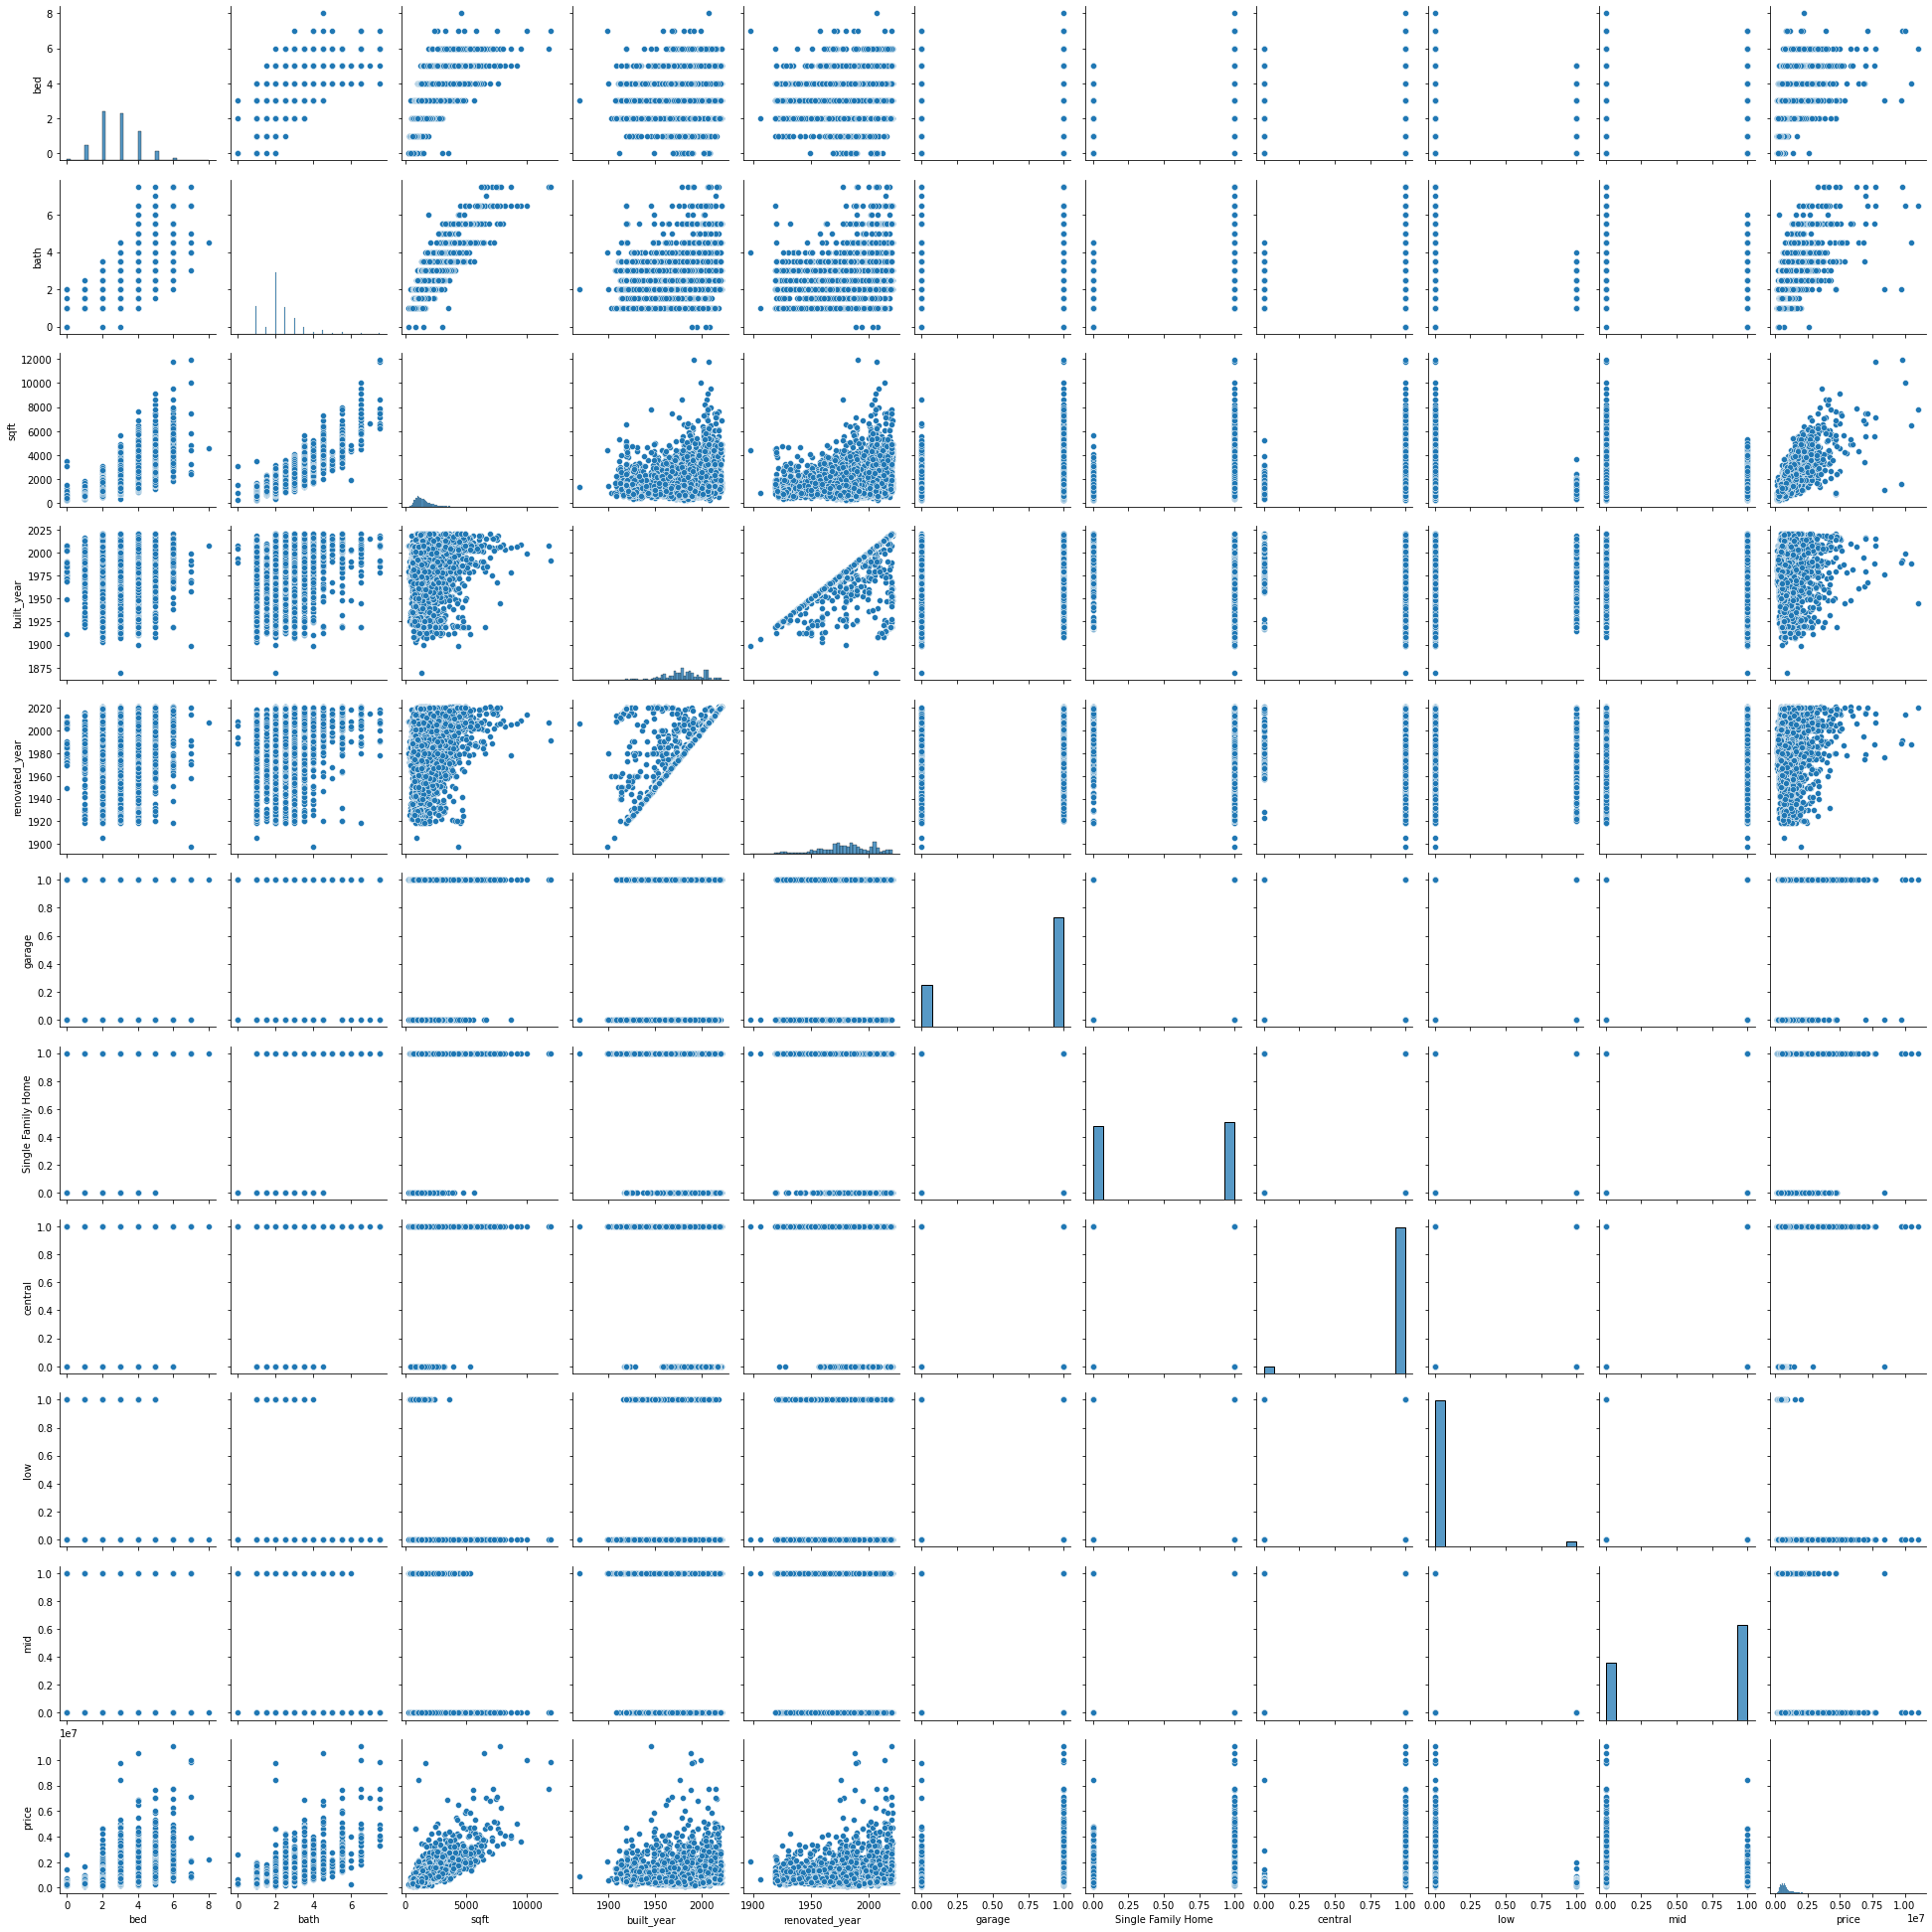

In [98]:
sns.pairplot(df2[['bed','bath','sqft','built_year','renovated_year', 'garage', 'Single Family Home', 'central', 'low', 'mid','price']])

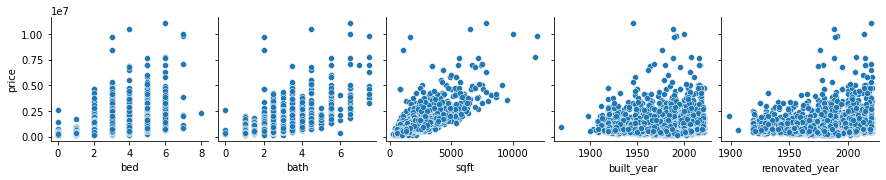

In [343]:
sns.pairplot(df2, x_vars=['bed','bath','sqft','built_year','renovated_year'], y_vars=['price'])

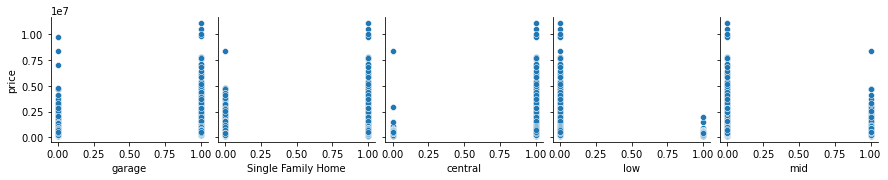

In [342]:
sns.pairplot(df2, x_vars=['garage', 'Single Family Home', 'central', 'low', 'mid'], y_vars=['price'])

**Calculate Alpha/Lambda Strength for ridge & lasso**

In [106]:
#Mean Absolute Error (MAE)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [128]:
X = df2[['bed','bath','sqft','built_year','renovated_year', 'garage', 'Single Family Home', 'central', 'low', 'mid']]
y = df2['price']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=10)

alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.values, y_train)
    
    val_set_pred = pipe.predict(X_val.values)
    err_vec_val[i] = mae(y_val, val_set_pred)

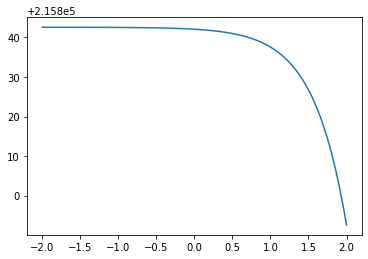

In [129]:
plt.plot(np.log10(alphalist), err_vec_val)

In [130]:
np.min(err_vec_val)

215792.6045571199

In [131]:
alphalist[np.argmin(err_vec_val)]

100.0

**Simple/Ridge/Lasso**

In [305]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
X = df2[['bed','bath','sqft','built_year','renovated_year', 'garage', 'Single Family Home', 'central', 'low', 'mid']]
y = df2['price']
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
X, y = np.array(X), np.array(y)

In [306]:
kf = KFold(n_splits=5, shuffle=True, random_state = 72)
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_lasso_r2s = [], [], [] #collect the validation results for both models
cv_lm_r2s_tr, cv_lm_reg_r2s_tr, cv_lm_lasso_r2s_tr = [], [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm = LinearRegression()
    lm_reg = Ridge(alpha=100)
    lm_lasso = Lasso(alpha=100)

    lm.fit(X_train, y_train)
    cv_lm_r2s.append(lm.score(X_val, y_val))
    cv_lm_r2s_tr.append(lm.score(X_train, y_train))
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))
    cv_lm_reg_r2s_tr.append(lm_reg.score(X_train_scaled, y_train))
    #lasso with feature scaling
    lm_lasso.fit(X_train_scaled, y_train)
    cv_lm_lasso_r2s.append(lm_lasso.score(X_val_scaled, y_val))
    cv_lm_lasso_r2s_tr.append(lm_lasso.score(X_train_scaled, y_train))


print('Simple regression train scores: ', cv_lm_r2s_tr)
print('Simple regression scores: ', cv_lm_r2s)
print('Ridge train scores: ', cv_lm_reg_r2s_tr)
print('Ridge scores: ', cv_lm_reg_r2s)
print('Lasso train scores: ', cv_lm_lasso_r2s_tr)
print('Lasso scores: ', cv_lm_lasso_r2s, '\n')

print(f'Simple mean cv train r^2: {np.mean(cv_lm_r2s_tr):.3f} +- {np.std(cv_lm_r2s_tr):.3f}')
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv train r^2: {np.mean(cv_lm_reg_r2s_tr):.3f} +- {np.std(cv_lm_reg_r2s_tr):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'Lasso mean cv train r^2: {np.mean(cv_lm_lasso_r2s_tr):.3f} +- {np.std(cv_lm_lasso_r2s_tr):.3f}')
print(f'Lasso mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}')

Simple regression train scores:  [0.6048069109731244, 0.602382030441038, 0.6344689338518017, 0.6145813579283077, 0.6400510266330608]
Simple regression scores:  [0.6599530071612223, 0.6997982044534454, 0.5458148984275657, 0.6292342826179947, 0.4979621630537152]
Ridge train scores:  [0.6038665310218388, 0.6014066944510416, 0.6334373520993308, 0.6137097612029841, 0.6389664252557847]
Ridge scores:  [0.6556477947957513, 0.6995188018147236, 0.5495797393859474, 0.6235190212739654, 0.5049606703682241]
Lasso train scores:  [0.6048063576245761, 0.6023815027725989, 0.6344684166047547, 0.6145808189419788, 0.6400505087657933]
Lasso scores:  [0.6598874375360418, 0.6998196082222421, 0.5458620426566831, 0.6292149346294578, 0.4980326038968156] 

Simple mean cv train r^2: 0.619 +- 0.015
Simple mean cv r^2: 0.607 +- 0.074
Ridge mean cv train r^2: 0.618 +- 0.015
Ridge mean cv r^2: 0.607 +- 0.071
Lasso mean cv train r^2: 0.619 +- 0.015
Lasso mean cv r^2: 0.607 +- 0.074


**Test for ridge/lasso**

In [307]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=100)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.598


In [148]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_lasso = Lasso(alpha=100)
lm_lasso.fit(X_scaled,y)
print(f'lasso Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

lasso Regression test R^2: 0.598


**Ridge Pred test/Actual test**

In [308]:
X = df2[['bed','bath','sqft','built_year','renovated_year', 'garage', 'Single Family Home', 'central', 'low', 'mid']]
y = df2['price']
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
lm_reg = Ridge(alpha=100)
lm_reg.fit(X_scaled,y)
lm_reg.predict(X_test_scaled)-y_test

7210    128165.550529
591     272312.222691
1112    206757.081788
3949    210380.492118
1361      6929.623302
            ...      
1652     40313.098898
7200    427465.305736
1832     32506.234288
1863    -93369.241935
939    -148664.657293
Name: price, Length: 1554, dtype: float64

Text(0.5, 1.0, 'Ridge Regression Price Prediction')

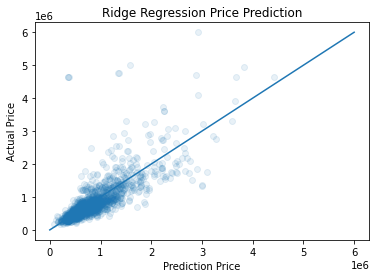

In [309]:
test_pred = lm_reg.predict(X_test_scaled)
plt.scatter(test_pred, y_test, alpha=0.1)
plt.plot(np.linspace(0,6000000,1000), np.linspace(0,6000000,1000))
plt.xlabel('Prediction Price')
plt.ylabel('Actual Price')
plt.title('Ridge Regression Price Prediction')

In [229]:
df4 = pd.DataFrame({'Real_Values': y_test, 'Predicted_Values':test_pred})
df4

,Real_Values,Predicted_Values
7210,690000,8.505692e+05
591,1005000,1.240386e+06
1112,650000,8.480373e+05
3949,485000,7.127205e+05
1361,812000,8.163855e+05
...,...,...
1652,320000,3.723180e+05
7200,2086725,2.573376e+06
1832,760000,8.494921e+05
1863,765000,6.861940e+05


In [247]:
mae(y_test, test_pred)

206732.73183265916

Text(0, 0.5, 'Frequency')

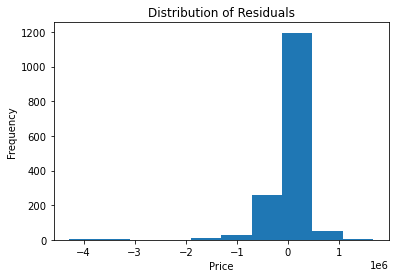

In [312]:
plt.hist(lm_reg.predict(X_test_scaled)-y_test)
plt.title('Distribution of Residuals')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [248]:
for feature, coef in zip(feature_names, lm_reg.coef_):
    print(feature, ':', f'{coef:.2f}')

bed : -128432.82
bath : 74849.33
sqft : 522605.14
built_year : -124276.75
renovated_year : 62722.51
garage : 12889.52
Single Family Home : 41861.66
central : 33104.92
low : -45771.52
mid : -80603.96


**poly simple/ridge/lasso**

In [256]:
X = df2[['bed','bath','sqft','built_year','renovated_year', 'garage', 'Single Family Home', 'central', 'low', 'mid']]
y = df2['price']
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
X, y = np.array(X), np.array(y)

In [260]:
kf = KFold(n_splits=5, shuffle=True, random_state = 72)
cv_lm_r2s, cv_lm_reg_r2s, cv_lm_lasso_r2s = [], [], [] #collect the validation results for both models
cv_lm_r2s_tr, cv_lm_reg_r2s_tr, cv_lm_lasso_r2s_tr = [], [], []

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple poly regression
    p = PolynomialFeatures(degree=2)
    X_train_poly = p.fit_transform(X_train)
    X_val_poly = p.fit_transform(X_val)
    lm = LinearRegression()
    lm_reg = Ridge(alpha=100)
    lm_lasso = Lasso(alpha=100, tol=0.0001, max_iter=100000)

    lm.fit(X_train, y_train)
    lm.fit(X_train_poly, y_train)
    cv_lm_r2s.append(lm.score(X_val_poly, y_val))
    cv_lm_r2s_tr.append(lm.score(X_train_poly, y_train))
    
    #feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_val_poly_scaled = scaler.fit_transform(X_val_poly)
    
    #ridge with feature scaling
    
    lm_reg.fit(X_train_poly_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_poly_scaled, y_val))
    cv_lm_reg_r2s_tr.append(lm_reg.score(X_train_poly_scaled, y_train))
    
    #lasso with feature scaling
    lm_lasso.fit(X_train_poly_scaled, y_train)
    cv_lm_lasso_r2s.append(lm_lasso.score(X_val_poly_scaled, y_val))
    cv_lm_lasso_r2s_tr.append(lm_lasso.score(X_train_poly_scaled, y_train))

print('Simple regression train scores: ', cv_lm_r2s_tr)
print('Simple regression scores: ', cv_lm_r2s)
print('Ridge poly train scores: ', cv_lm_reg_r2s_tr)
print('Ridge poly scores: ', cv_lm_reg_r2s)
print('Lasso poly train scores: ', cv_lm_lasso_r2s_tr)
print('Lasso poly scores: ', cv_lm_lasso_r2s, '\n')

print(f'Simple poly mean cv train r^2: {np.mean(cv_lm_r2s_tr):.3f} +- {np.std(cv_lm_r2s_tr):.3f}')
print(f'Simple poly mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge poly mean cv train r^2: {np.mean(cv_lm_reg_r2s_tr):.3f} +- {np.std(cv_lm_reg_r2s_tr):.3f}')
print(f'Ridge poly mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')
print(f'Lasso poly mean cv train r^2: {np.mean(cv_lm_lasso_r2s_tr):.3f} +- {np.std(cv_lm_lasso_r2s_tr):.3f}')
print(f'Lasso poly mean cv r^2: {np.mean(cv_lm_lasso_r2s):.3f} +- {np.std(cv_lm_lasso_r2s):.3f}')

C:\Users\brian\.conda\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3057052236706.125, tolerance: 256871165484.89502
  model = cd_fast.enet_coordinate_descent(
C:\Users\brian\.conda\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2131497869482.125, tolerance: 283221599263.52814
  model = cd_fast.enet_coordinate_descent(
C:\Users\brian\.conda\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13455203384922.125, tolerance: 281195140998.20654
  model = cd_fast.enet_coordinate_descent(
C:\Users\brian\.conda\envs\metis\lib\site-packages\sklearn\linear_model\_coordina

Simple regression train scores:  [0.6614034914581872, 0.6632046817585429, 0.6874244769371435, 0.6701870820213085, 0.6926065649329768]
Simple regression scores:  [0.6198874423681406, 0.712036178444449, 0.6026556356653836, 0.6712309866414996, 0.558626081312376]
Ridge poly train scores:  [0.6287623022001121, 0.6238651525253025, 0.6528819129761096, 0.6316018213306347, 0.6613267924358743]
Ridge poly scores:  [0.6571946077562092, 0.7134283230523217, 0.5595513107134955, 0.6388407245137779, 0.45702140933340163]
Lasso poly train scores:  [0.6475636749105163, 0.649535778465004, 0.6746731761943894, 0.6583181294679177, 0.6813407148589927]
Lasso poly scores:  [0.6743686864035701, 0.7210876130728159, 0.5790963960840878, 0.6354443083902539, 0.47352325498679015] 

Simple poly mean cv train r^2: 0.675 +- 0.013
Simple poly mean cv r^2: 0.633 +- 0.054
Ridge poly mean cv train r^2: 0.640 +- 0.015
Ridge poly mean cv r^2: 0.605 +- 0.089
Lasso poly mean cv train r^2: 0.662 +- 0.014
Lasso poly mean cv r^2: 0.

C:\Users\brian\.conda\envs\metis\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10253500843969.25, tolerance: 288781433173.9239
  model = cd_fast.enet_coordinate_descent(


**Test for simply poly**

In [187]:
p = PolynomialFeatures(degree=2)
X_poly = p.fit_transform(X)
X_test_poly = p.fit_transform(X_test)
lm = LinearRegression()
lm.fit(X_poly,y)
print(f'simply poly Regression test R^2: {lm.score(X_test_poly, y_test):.3f}')

simply poly Regression test R^2: 0.640


**Pred test with actual test**

In [188]:
X = df2[['bed','bath','sqft','built_year','renovated_year', 'garage', 'Single Family Home', 'central', 'low', 'mid']]
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
p = PolynomialFeatures(degree=2)
X_poly = p.fit_transform(X)
X_train_poly = p.fit_transform(X_train)
X_test_poly = p.fit_transform(X_test)

In [189]:
lm = LinearRegression()
X_poly = p.fit_transform(X)
lm.fit(X_poly, y)
lm.predict(X_test_poly)-y_test

7210     27017.388677
591     241170.440735
1112    229691.903730
3949    128283.520068
1361     26463.821772
            ...      
1652     21805.168294
7200    289072.261751
1832   -171238.274064
1863     -3742.472973
939     -31961.042203
Name: price, Length: 1554, dtype: float64

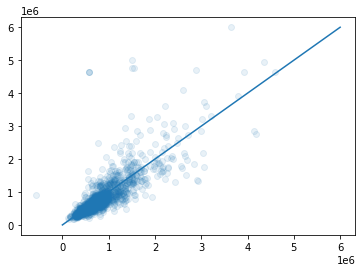

In [190]:
test_pred = lm.predict(X_test_poly)
plt.scatter(test_pred, y_test, alpha=0.1)
plt.plot(np.linspace(0,6000000,1000), np.linspace(0,6000000,1000))

In [185]:
df3 = pd.DataFrame({'Real_Values': y_test, 'Predicted_Values':test_pred})
df3

,Real_Values,Predicted_Values
7210,690000,7.170174e+05
591,1005000,1.246170e+06
1112,650000,8.796919e+05
3949,485000,6.132835e+05
1361,812000,8.384638e+05
...,...,...
1652,320000,3.418052e+05
7200,2086725,2.375797e+06
1832,760000,5.887617e+05
1863,765000,7.612575e+05


(array([   3.,    3.,    0.,    2.,   10.,   22.,  246., 1210.,   50.,
           8.]),
 array([-4077811.6794486 , -3511196.22817896, -2944580.77690932,
        -2377965.32563967, -1811349.87437003, -1244734.42310038,
         -678118.97183074,  -111503.52056109,   455111.93070855,
         1021727.3819782 ,  1588342.83324784]),
 <BarContainer object of 10 artists>)

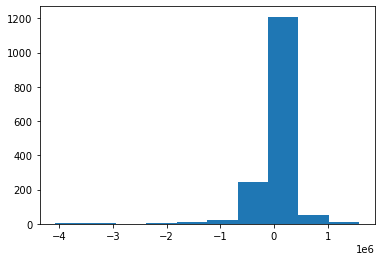

In [172]:
plt.hist(lm.predict(X_test_poly)-y_test)

In [173]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true))

In [174]:
mae(y_test, test_pred)

191258.0446351198

In [216]:
for feature, coef in zip(p.get_feature_names(feature_names), lm.coef_):
    print(feature, ':', f'{coef:.2f}')

1 : -0.15
bed : 554861.39
bath : -3396938.78
sqft : 6787.39
built_year : 254099.06
renovated_year : -682459.48
garage : 3080479.00
Single Family Home : 1735652.08
central : -3910826.95
low : -6998369.98
mid : -5562005.73
bed^2 : -25535.75
bed bath : 12605.66
bed sqft : -12.01
bed built_year : -589.76
bed renovated_year : 356.92
bed garage : -925.22
bed Single Family Home : 101649.07
bed central : -95295.70
bed low : 71716.38
bed mid : 33305.01
bath^2 : 11634.18
bath sqft : -59.56
bath built_year : 227.76
bath renovated_year : 1519.71
bath garage : -71072.86
bath Single Family Home : 76969.59
bath central : 57719.42
bath low : -127086.41
bath mid : -49822.76
sqft^2 : 0.07
sqft built_year : -3.68
sqft renovated_year : 0.43
sqft garage : 145.45
sqft Single Family Home : -329.74
sqft central : 176.73
sqft low : -282.55
sqft mid : -131.56
built_year^2 : -262.69
built_year renovated_year : 388.29
built_year garage : 1440.00
built_year Single Family Home : -908.35
built_year central : -439.39

**initial simple regression for df**

In [272]:
lm = LinearRegression()
X = df[['bed','bath','sqft','built_year','renovated_year', 'garage']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10)
lm.fit(X_train, y_train)
print(lm.score(X_train, y_train))

0.5296591178227926


In [273]:
lm.fit(X,y)
lm.score(X_test, y_test)

0.3444453484848671

In [274]:
test_pred = lm.predict(X_test)
mae(y_test, test_pred)

254243.99246980323

Text(0.5, 1.0, 'Simple Regression Price Prediction')

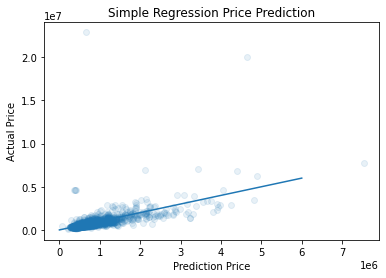

In [275]:
plt.scatter(test_pred, y_test, alpha=0.1)
plt.plot(np.linspace(0,6000000,1000), np.linspace(0,6000000,1000))
plt.xlabel('Prediction Price')
plt.ylabel('Actual Price')
plt.title('Simple Regression Price Prediction')

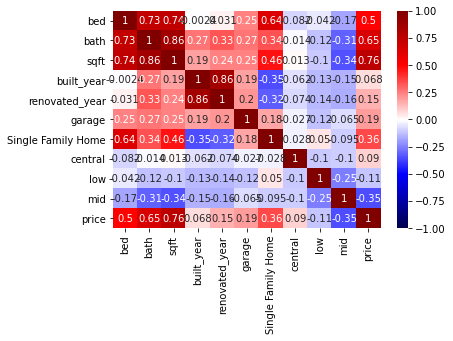

In [251]:
sns.heatmap(df2[['bed','bath','sqft','built_year','renovated_year', 'garage', 'Single Family Home', 'central', 'low', 'mid','price']].corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [278]:
df4

,Real_Values,Predicted_Values
7210,690000,8.505692e+05
591,1005000,1.240386e+06
1112,650000,8.480373e+05
3949,485000,7.127205e+05
1361,812000,8.163855e+05
...,...,...
1652,320000,3.723180e+05
7200,2086725,2.573376e+06
1832,760000,8.494921e+05
1863,765000,6.861940e+05


In [282]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554 entries, 7210 to 939
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Real_Values       1554 non-null   float64
 1   Predicted_Values  1554 non-null   float64
dtypes: float64(2)
memory usage: 36.4 KB


In [280]:
df4['Real_Values'] = df4['Real_Values'].astype(float)

In [288]:
df4['residual'] = abs(df4['Predicted_Values'] - df4['Real_Values'])
df4

,Real_Values,Predicted_Values,residual
7210,690000.0,8.505692e+05,160569.214481
591,1005000.0,1.240386e+06,235386.153675
1112,650000.0,8.480373e+05,198037.337509
3949,485000.0,7.127205e+05,227720.462665
1361,812000.0,8.163855e+05,4385.532926
...,...,...,...
1652,320000.0,3.723180e+05,52318.026017
7200,2086725.0,2.573376e+06,486650.704687
1832,760000.0,8.494921e+05,89492.108515
1863,765000.0,6.861940e+05,78805.993645


In [289]:
df4[df4['residual']<100]

,Real_Values,Predicted_Values,residual
434,618500.0,618493.685571,6.314429


In [301]:
df4[df4['residual']>1000000].sort_values('residual',ascending=False).head(10)

,Real_Values,Predicted_Values,residual
3544,4650000.0,3.416093e+05,4.308391e+06
3542,4650000.0,3.416093e+05,4.308391e+06
3535,4650000.0,3.652140e+05,4.284786e+06
2841,5000000.0,1.570339e+06,3.429661e+06
4252,4750000.0,1.357704e+06,3.392296e+06
4254,4750000.0,1.387702e+06,3.362298e+06
4084,6000000.0,3.054885e+06,2.945115e+06
7105,1330000.0,3.130545e+06,1.800545e+06
3195,3300000.0,1.541628e+06,1.758372e+06
6755,1375000.0,3.127166e+06,1.752166e+06


In [291]:
df2.loc[434]['link']

'http://realtor.com/realestateandhomes-detail/2346-Hopkins-St_San-Diego_CA_92139_M22942-36407'

In [302]:
df2.loc[2841]['link']

'http://realtor.com/realestateandhomes-detail/329-Dunemere-Dr_La-Jolla_CA_92037_M15724-62081'

In [314]:
df[df['price'] > 20000000]

,Unnamed: 0,property_type,price,bed,bath,sqft,address,link,solddate,built_year,...,city,division,Single Family Home,EAST,NORTH,SOUTH,central,neighborhood,low,mid
1077,1077,Single Family Home,22900000,1,1.0,872,"12805ElCaminoReal,SanDiego,CA92130",http://realtor.com/realestateandhomes-detail/1...,/March122021,1955.0,...,"SD, CARMEL VALLEY",CENTRAL,1,0,0,0,True,high,0,0
4334,4334,Single Family Home,24700000,4,5.5,6071,"8466ElPaseoGrande,LaJolla,CA92037",http://realtor.com/realestateandhomes-detail/8...,/December222020,1980.0,...,LA JOLLA,CENTRAL,1,0,0,0,True,high,0,0
4626,4626,Single Family Home,21625000,7,9.0,7640,"6114CaminodelaCosta,LaJolla,CA92037",http://realtor.com/realestateandhomes-detail/6...,/December172020,1934.0,...,LA JOLLA,CENTRAL,1,0,0,0,True,high,0,0


In [315]:
df.loc[4626]['link']

'http://realtor.com/realestateandhomes-detail/6114-Camino-de-la-Costa_La-Jolla_CA_92037_M17880-70688'

In [317]:
df4[(df4['Real_Values'] > 450000) & (df4['Real_Values'] < 550000)]

,Real_Values,Predicted_Values,residual
3949,485000.0,712720.462665,227720.462665
4886,547000.0,494503.594569,52496.405431
6732,470000.0,363608.089814,106391.910186
4746,545000.0,786114.174183,241114.174183
3456,452000.0,381008.231564,70991.768436
...,...,...,...
1229,465000.0,504566.182996,39566.182996
7413,540000.0,505224.603944,34775.396056
1378,466000.0,510098.131042,44098.131042
1671,510000.0,418310.349238,91689.650762


In [318]:
df5 = df4[(df4['Real_Values'] > 450000) & (df4['Real_Values'] < 550000)]

In [319]:
df5.describe()

,Real_Values,Predicted_Values,residual
count,183.000000,1.830000e+02,183.000000
mean,503107.377049,5.691101e+05,122869.374525
std,28702.448735,1.621686e+05,120032.003244
min,450500.000000,2.205686e+05,2341.263253
25%,480000.000000,4.569016e+05,46703.222030
50%,506000.000000,5.419464e+05,82159.689991
75%,530000.000000,6.506087e+05,164410.510671
max,549500.000000,1.275001e+06,755001.173016


In [321]:
wanted_house_list = list(df5.index)

In [325]:
wanted_house = df2.loc[wanted_house_list]
wanted_house

,Unnamed: 0,property_type,price,bed,bath,sqft,address,link,solddate,built_year,...,city,division,Single Family Home,EAST,NORTH,SOUTH,central,neighborhood,low,mid
3949,3949,Condo/Townhome,485000,0,2.0,1003,"1050IslandAveUnit321,SanDiego,CA92101",http://realtor.com/realestateandhomes-detail/1...,/January42021,2005.0,...,"SD, DOWNTOWN",CENTRAL,0,0,0,0,True,mid,0,1
4886,4886,Single Family Home,547000,4,2.0,1180,"93540thSt,SanDiego,CA92102",http://realtor.com/realestateandhomes-detail/9...,/December112020,1953.0,...,SAN DIEGO,CENTRAL,1,0,0,0,True,mid,0,1
6732,6732,Single Family Home,470000,2,1.0,756,"213S33rdSt,SanDiego,CA92113",http://realtor.com/realestateandhomes-detail/2...,/November32020,1952.0,...,"SD, LOGAN HEIGHTS",CENTRAL,1,0,0,0,True,low,1,0
4746,4746,Condo/Townhome,545000,3,2.5,2005,"5321CalleRockfishUnit88,SanDiego,CA92154",http://realtor.com/realestateandhomes-detail/5...,/December152020,2018.0,...,"SD, OTAY MESA",SOUTH,0,0,0,1,False,mid,0,1
3456,3456,Condo/Townhome,452000,2,1.0,835,"3769WilsonAveUnit7,SanDiego,CA92104",http://realtor.com/realestateandhomes-detail/3...,/January142021,1979.0,...,"SD, NORTH PARK",CENTRAL,0,0,0,0,True,mid,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,1229,Condo/Townhome,465000,1,1.0,748,"3887PellPlUnit229,SanDiego,CA92130",http://realtor.com/realestateandhomes-detail/3...,/March92021,2006.0,...,"SD, CARMEL VALLEY",CENTRAL,0,0,0,0,True,high,0,0
7413,7413,Condo/Townhome,540000,2,2.0,1075,"425WBeechStUnit506,SanDiego,CA92101",http://realtor.com/realestateandhomes-detail/4...,/October192020,2004.0,...,"SD, DOWNTOWN",CENTRAL,0,0,0,0,True,mid,0,1
1378,1378,Condo/Townhome,466000,2,2.0,977,"2228RiverRunDrUnit175,SanDiego,CA92108",http://realtor.com/realestateandhomes-detail/2...,/March52021,1985.0,...,"SD, MISSION VALLEY",CENTRAL,0,0,0,0,True,mid,0,1
1671,1671,Condo/Townhome,510000,1,1.5,768,"1240IndiaStUnit100,SanDiego,CA92101",http://realtor.com/realestateandhomes-detail/1...,/March12021,2003.0,...,"SD, DOWNTOWN",CENTRAL,0,0,0,0,True,mid,0,1


In [332]:
prospect_house = wanted_house[(wanted_house['property_type'] == 'Condo/Townhome') & (wanted_house['bed'] == 2) & (wanted_house['city'] == 'SD, MISSION VALLEY')]

In [333]:
house_list = list(prospect_house.index)

In [339]:
prospect_house[['property_type', 'city', 'price', 'bed', 'bath']]

,property_type,city,price,bed,bath
2655,Condo/Townhome,"SD, MISSION VALLEY",457900,2,2.0
3790,Condo/Townhome,"SD, MISSION VALLEY",538000,2,2.0
4384,Condo/Townhome,"SD, MISSION VALLEY",535000,2,2.5
1051,Condo/Townhome,"SD, MISSION VALLEY",488750,2,2.0
1378,Condo/Townhome,"SD, MISSION VALLEY",466000,2,2.0
4374,Condo/Townhome,"SD, MISSION VALLEY",505000,2,2.0


In [334]:
df5.loc[house_list]

,Real_Values,Predicted_Values,residual
2655,457900.0,515501.896704,57601.896704
3790,538000.0,758898.877126,220898.877126
4384,535000.0,669271.607360,134271.607360
1051,488750.0,515501.896704,26751.896704
1378,466000.0,510098.131042,44098.131042
4374,505000.0,500524.972346,4475.027654


In [336]:
df5.loc[house_list].describe()

,Real_Values,Predicted_Values,residual
count,6.000000,6.000000,6.000000
mean,498441.666667,578299.563547,81349.572765
std,33865.622933,109068.273274,81384.241766
min,457900.000000,500524.972346,4475.027654
25%,471687.500000,511449.072457,31088.455289
50%,496875.000000,515501.896704,50850.013873
75%,527500.000000,630829.179696,115104.179696
max,538000.000000,758898.877126,220898.877126


In [335]:
df2.describe()

,Unnamed: 0,price,bed,bath,sqft,built_year,renovated_year,lotsize,story,garage,parking,zipcode,Single Family Home,EAST,NORTH,SOUTH,low,mid
count,7770.000000,7.770000e+03,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7.587000e+03,5944.000000,7770.000000,6854.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000,7770.000000
mean,3886.782754,8.765453e+05,2.794981,2.218340,1608.974775,1979.331532,1981.303604,6.974730e+04,1.417227,0.722523,2.902976,92112.358430,0.514157,0.000901,0.000515,0.040154,0.036293,0.627284
std,2244.625308,7.183070e+05,1.147305,0.942472,981.539546,22.486242,21.465856,1.290081e+05,0.908323,0.447783,2.694376,25.317662,0.499832,0.030003,0.022685,0.196334,0.187031,0.483558
min,0.000000,1.240000e+05,0.000000,0.000000,288.000000,1869.000000,1898.000000,6.800000e+02,0.000000,0.000000,1.000000,91901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1943.250000,4.950000e+05,2.000000,2.000000,1003.250000,1968.000000,1970.000000,6.212000e+03,1.000000,0.000000,2.000000,92106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3886.500000,6.900000e+05,3.000000,2.000000,1357.000000,1980.000000,1981.000000,1.131000e+04,1.000000,1.000000,2.000000,92115.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5830.750000,9.700000e+05,4.000000,2.500000,1891.000000,1995.000000,1999.000000,7.047000e+04,2.000000,1.000000,4.000000,92127.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,7773.000000,1.106952e+07,8.000000,7.500000,11925.000000,2021.000000,2021.000000,1.177110e+06,39.000000,1.000000,109.000000,92173.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
